In [115]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

## Hipótesis respecto a un valor: ##
* Ejemplo: "La tasa de mortalidad por COVID-19 en un país específico es superior al 50%".


## Hipótesis respecto dos muestras independientes: ##
* Ejemplo: "La tasa de vacunación es diferente entre dos continentes".


## Hipótesis varias categorías: ##
* Ejemplo: "Diferencias en las tasas de infección entre varios países".


## Hipótesis dos muestras relacionadas: ##
* Ejemplo: "La tasa de infección ha cambiado significativamente antes y después de la introducción de las vacunas en un país".


In [116]:
df_covid_world = pd.read_csv('./owid-covid-data.csv')
df_covid_world = df_covid_world.dropna(subset=['total_deaths', 'total_cases', 'people_fully_vaccinated_per_hundred', 'population','new_cases'])
df_covid_world.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64188 entries, 494 to 320016
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       64188 non-null  int64  
 1   iso_code                                    64188 non-null  object 
 2   continent                                   53516 non-null  object 
 3   location                                    64188 non-null  object 
 4   date                                        64188 non-null  object 
 5   total_cases                                 64188 non-null  float64
 6   new_cases                                   64188 non-null  float64
 7   new_cases_smoothed                          64188 non-null  float64
 8   total_deaths                                64188 non-null  float64
 9   new_deaths                                  64177 non-null  float64
 10  new_deaths_s

## Hipótesis respecto a un valor: ##
* La tasa de mortalidad por COVID-19 en un España es superior al 4%.

- H0: La mortalidad por COVID-19 en españa es superiro al 4% (X)
- H1: La mortalidad por COVID-19 en españa es inferior al 4% (OK)

1.726540405544763
             T  dof alternative  p-val         CI95%  cohen-d        BF10  \
T-test -75.095  338        less    0.0  [-inf, 1.78]    4.079  1.049e+209   

        power  
T-test    1.0  
Segun los datos España tiene una mortalidad por COVID-19 inferior al 4%


<Axes: xlabel='location', ylabel='percent_mortality'>

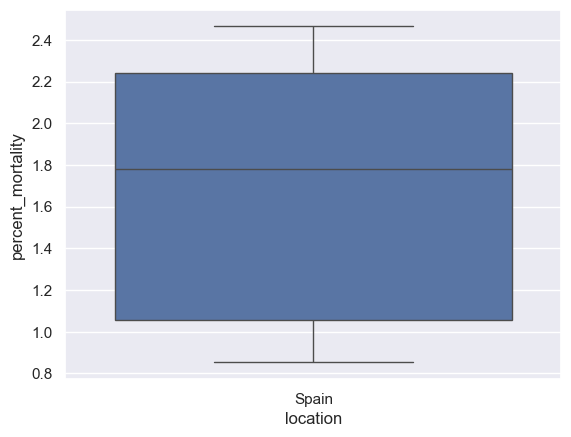

In [117]:
df_data_spain = df_covid_world[df_covid_world['location'] == 'Spain']

#df_data_spain = df_data_spain.dropna(subset=['total_deaths', 'total_cases'])

df_data_spain = df_data_spain[df_data_spain['total_cases']!=0]



df_data_spain['percent_mortality'] = df_data_spain['total_deaths'] / df_data_spain['total_cases'] * 100

print(df_data_spain['percent_mortality'].mean())

resul = pg.ttest(df_data_spain['percent_mortality'], 4 , alternative='less')
print(round(resul,3))

print('Segun los datos España tiene una mortalidad por COVID-19 inferior al 4%')

sns.boxplot(y='percent_mortality', x='location',data=df_data_spain)



## Hipótesis respecto dos muestras independientes: ##
* La tasa de vacunación es igual entre dos continentes (EEUU, Europa).

- H0: La tasa de vacunacion es igual en Europa que en EEUU. (X)
- H1: La tasa de vacunacion es diferente en Europa que en EEUU. (OK)

49.36576998050682
46.239472456254056
           T       dof alternative  p-val           CI95%  cohen-d       BF10  \
T-test -8.57  15112.26   two-sided    0.0  [-3.84, -2.41]     0.11  1.277e+14   

        power  
T-test    1.0  
Segun la prueba la tasa de vacunacion es diferenete entre Europa y EEUU


<Axes: xlabel='continent', ylabel='people_fully_vaccinated_per_hundred'>

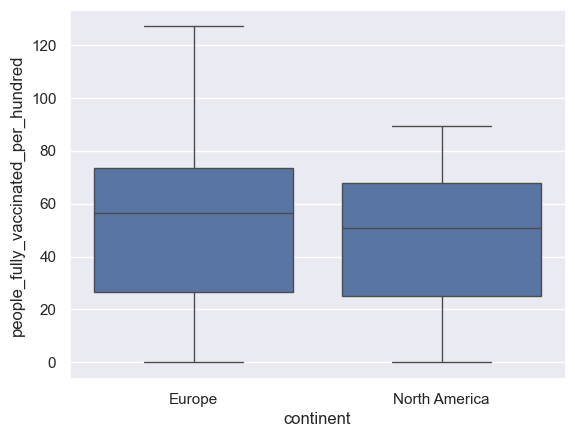

In [118]:
df_amercaN = df_covid_world[df_covid_world['continent'] == 'North America']
df_europa = df_covid_world[df_covid_world['continent'] == 'Europe']

df_location = df_covid_world[df_covid_world['continent'].isin( ['Europe','North America'])]

print(df_europa['people_fully_vaccinated_per_hundred'].mean())
print(df_amercaN['people_fully_vaccinated_per_hundred'].mean())

test_resul = pg.ttest(df_amercaN['people_fully_vaccinated_per_hundred'], df_europa['people_fully_vaccinated_per_hundred'] )
print(round(test_resul,2))

print('Segun la prueba la tasa de vacunacion es diferenete entre Europa y EEUU')

sns.boxplot(y='people_fully_vaccinated_per_hundred', x='continent',data=df_location)


## Hipótesis varias categorías: ##
* Son iguales las tasas de infección entre varios países ('Spain', 'United States', 'South Africa').

- H0: La tasa de infección son iguales en ('Spain', 'United States', 'South Africa') (X)
- H1: La tasa de infección son distintas en ('Spain', 'United States', 'South Africa') (OK)

location
South Africa      5616.993026
Spain            13199.957967
United States    19515.548420
Name: infection_rate, dtype: float64
     Source  ddof1  ddof2        F  p-unc    np2
0  location      2   1691  594.234    0.0  0.413
Segun los datos y el boxplot se puede observar que si existe una diferencia de infección entre paises


<Axes: xlabel='location', ylabel='infection_rate'>

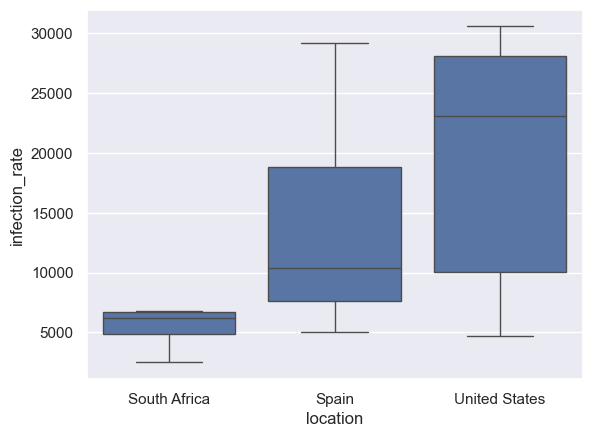

In [124]:
df_covid_world['infection_rate'] = (df_covid_world['total_cases'] / df_covid_world['population']) * 100000

paises = ['Spain', 'United States', 'South Africa']

df_covid_pais = df_covid_world[df_covid_world['location'].isin(paises)]

print(df_covid_pais.groupby('location')['infection_rate'].mean())
resul = pg.anova(data=df_covid_pais,dv='infection_rate', between='location')

print(round(resul,3))

print('Segun los datos y el boxplot se puede observar que si existe una diferencia de infección entre paises')

sns.boxplot(y='infection_rate', x='location',data=df_covid_pais)

## Hipótesis dos muestras relacionadas: ##
* La tasa de infección ha disminuido significativamente antes y después de la introducción de las vacunas en Spain.

- H0: La tasa de infección ha disminuido despues de la vacunación (~)
- H1: La tasa de infección aumento despues de la vacunación (OK)

Menor: T-test    1.0
Name: p-val, dtype: float64
Mayor: T-test    3.395778e-27
Name: p-val, dtype: float64



<Axes: xlabel='vacunated', ylabel='tasa_infeccion_diaria'>

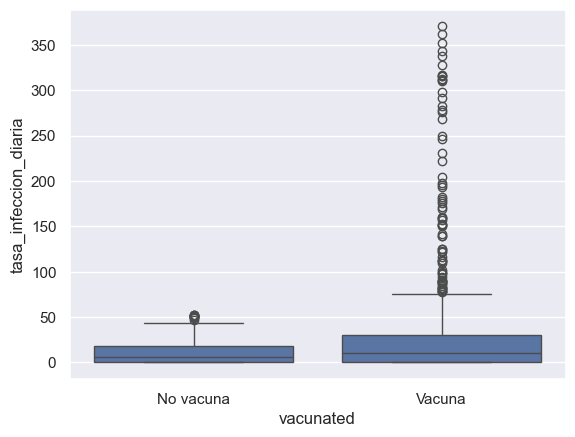

In [132]:
df_covid_world = pd.read_csv('./owid-covid-data.csv')


df_data_spain = df_covid_world[df_covid_world['location'] == 'Spain']

#df_data_spain = df_data_spain.dropna(subset=['total_deaths', 'total_cases'])

df_data_spain = df_data_spain[df_data_spain['total_cases']!=0]
df_data_spain['date'] = pd.to_datetime(df_data_spain['date'])
fecha_inicio_vacunacion = pd.Timestamp('2020-12-27')

antes_vacunacion = df_data_spain[df_data_spain['date'] < fecha_inicio_vacunacion]
despues_vacunacion = df_data_spain[df_data_spain['date'] >= fecha_inicio_vacunacion]

antes_vacunacion = antes_vacunacion[antes_vacunacion['population'] > 0]
despues_vacunacion = despues_vacunacion[despues_vacunacion['population'] > 0]

antes_vacunacion = antes_vacunacion[antes_vacunacion['new_cases'] > 0]
despues_vacunacion = despues_vacunacion[despues_vacunacion['new_cases'] > 0]

antes_vacunacion['tasa_infeccion_diaria'] = antes_vacunacion['new_cases'] / antes_vacunacion['population'] * 100000
despues_vacunacion['tasa_infeccion_diaria'] = despues_vacunacion['new_cases'] / despues_vacunacion['population'] * 100000

resultados_test = pg.ttest(antes_vacunacion['tasa_infeccion_diaria'], despues_vacunacion['tasa_infeccion_diaria'], alternative='greater')
print(f"Menor: {resultados_test['p-val']}")


resultados_test = pg.ttest(antes_vacunacion['tasa_infeccion_diaria'], despues_vacunacion['tasa_infeccion_diaria'], alternative='less')
print(f"Mayor: {resultados_test['p-val']}")

df_data_spain_plot = df_data_spain.copy()
df_data_spain_plot['tasa_infeccion_diaria'] = df_data_spain_plot['new_cases'] / df_data_spain_plot['population'] * 100000
df_data_spain_plot['vacunated'] = np.where(df_data_spain_plot['date'] >= fecha_inicio_vacunacion, 'Vacuna', 'No vacuna')

print('Segun los datos no se descarta que se bajen la tasa de infección despues de la vacuna, pero si aumento despues de la vacuna')

sns.boxplot(y='tasa_infeccion_diaria', x='vacunated',data=df_data_spain_plot)
